In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS 

In [27]:
BTC_data = pd.read_csv('BTC.csv',encoding="utf-8")

In [28]:
BNB_data = pd.read_csv('BNB.csv',encoding="utf-8")

In [29]:
ETH_data = pd.read_csv('ETH.csv',encoding="utf-8")

In [30]:
def convert(value):
    return float(value.replace(',', ''))

In [31]:
def adf(price):
    from arch.unitroot import ADF
    from arch.unitroot import PhillipsPerron
    from arch.unitroot import KPSS 
    adf_test = ADF(price, max_lags=10 ,trend="c",method="BIC")
    # 假設:  資料有單根(資料非定態)
    pp_test = PhillipsPerron(price)
    # 假設:  資料是弱定態
    kpss_test = KPSS(price)
    return adf_test,pp_test,kpss_test

In [32]:
def photo(value):
    plt.figure(figsize=(20, 8))
    plt.plot(value)
    plt.title('close pirce')
    plt.xlabel('Time')
    plt.ylabel('pirce')
    plt.show()

In [33]:
def rel(value):
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    from statsmodels.tsa.stattools import acf, pacf

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    plot_acf(value, ax=ax) 
    plot_pacf(value, ax=ax2) 
    plt.show()
    ## 連第0期也有呈現

    value1 = acf(value, qstat = True, nlags=30)
    value2 = pacf(value, nlags=30)
    
    # 白噪音檢驗
    from statsmodels.tsa.stattools import q_stat

    ljung_box = q_stat(
    acf(value)[1:], 
    len(value)
    )
    return value1,value2,ljung_box

In [34]:
ETH_price = ETH_data['收盤價'].apply(convert)

In [35]:
BTC_price = BTC_data['收盤價'].apply(convert)

In [36]:
BNB_price = BNB_data['收盤價']

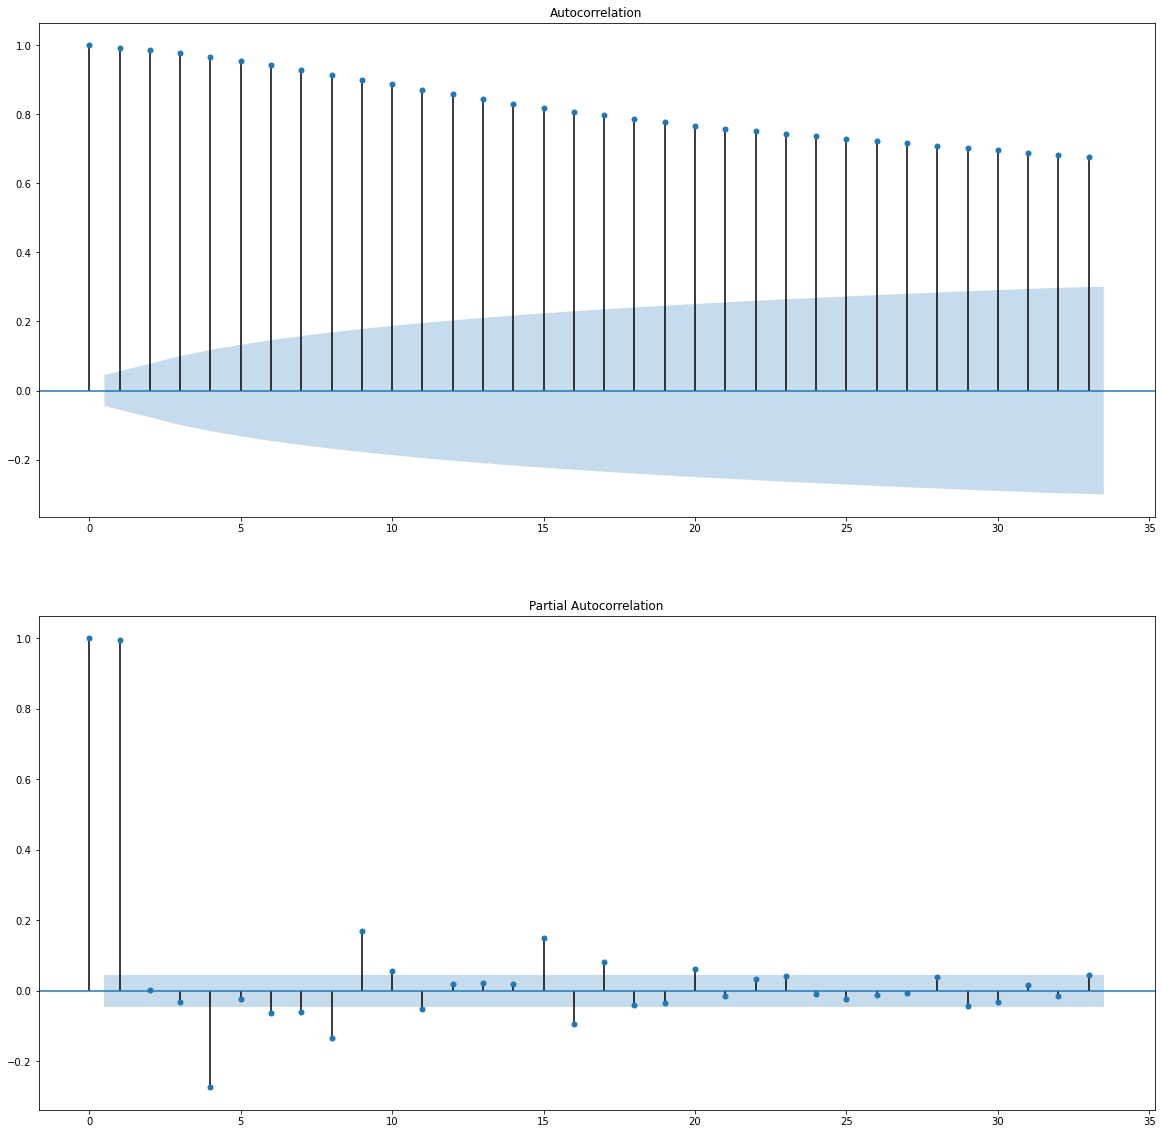

C:\Users\pured\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\pured\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


((array([1.        , 0.99268412, 0.98546073, 0.97787567, 0.96665356,
         0.95529215, 0.94302548, 0.92917063, 0.91367884, 0.89997072,
         0.88632272, 0.87130914, 0.85755133, 0.84394328, 0.8302269 ,
         0.8190553 , 0.80733558, 0.7965765 , 0.78632024, 0.7758741 ,
         0.76703882, 0.75816125, 0.75023033, 0.74278248, 0.73555847,
         0.72863093, 0.72163979, 0.71526529, 0.70909908, 0.70230597,
         0.69573579]),
  array([ 1874.27373637,  3722.34365135,  5543.03375604,  7323.11397272,
          9062.51422547, 10758.42625273, 12405.74216962, 13999.42790879,
         15546.46968124, 17047.7399696 , 18499.3489013 , 19906.22363658,
         21269.52513426, 22589.57192129, 23875.01434183, 25124.59687557,
         26341.74222548, 27528.37732726, 28684.30788398, 29814.6632296 ,
         30919.59295143, 32002.10327536, 33063.7928356 , 34105.48695522,
         35128.19743126, 36131.91204031, 37118.49938787, 38088.66781986,
         39040.84592995, 39975.7917931 ]),
  array([

In [37]:
rel(ETH_price)

In [38]:
adf(ETH_price)

(<class 'arch.unitroot.unitroot.ADF'>
 """
    Augmented Dickey-Fuller Results   
 Test Statistic                 -8.242
 P-value                         0.000
 Lags                                9
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 <class 'arch.unitroot.unitroot.PhillipsPerron'>
 """
      Phillips-Perron Test (Z-tau)    
 Test Statistic                 -3.695
 P-value                         0.004
 Lags                               26
 -------------------------------------
 
 Trend: Constant
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
 Null Hypothesis: The process contains a unit root.
 Alternative Hypothesis: The process is weakly stationary.
 """,
 <class 'arch.unitroot.unitroot.KPSS'>
 """
     KPSS Stationarity Test Results   
 Test Statistic                  1.773
 P-value   

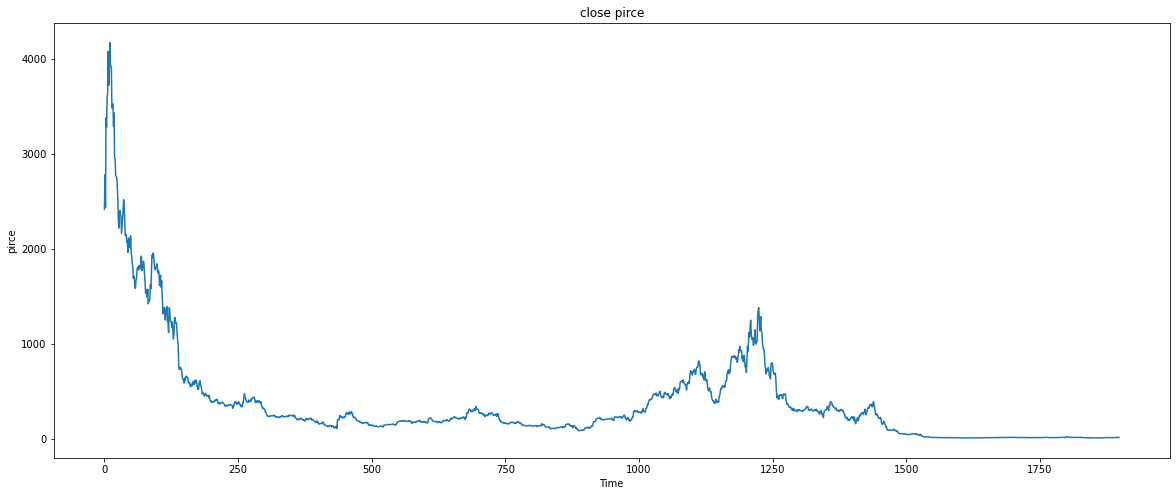

In [39]:
photo(ETH_price)